In [1]:
import os
os.chdir("..")
print(os.getcwd())

import sys
from pathlib import Path
from importlib import reload

/hs/fs08/data/group-brueggen/tmartinez/diffusion/src


In [2]:
import data.cutouts as cts
import data.images as imgs
import utils.paths as paths

cutout_file = paths.CUTOUTS_DIR / 'cutouts_200p_optC.hdf5'
cts.scan_cutouts(cutout_file)

Reading file cutouts_200p_optC.hdf5...
Adding broken flag...
Adding edge relative max...


	: 100%|██████████| 314826/314826 [00:02<00:00, 118299.30it/s]


Adding Sigma-SNR...


	: 100%|██████████| 314826/314826 [18:38<00:00, 281.48it/s]


Saving catalog...


/hs/fs08/data/group-brueggen/tmartinez/diffusion/src/data/cutouts.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Mosaic_ID', 'Source_Name', 'S_Code', 'Created', 'Position_from',
       'Renamed_from', 'UID_L', 'UNWISE_OBJID', 'ID_NAME', 'type', 'star',
       'ANYMASK_OPT', 'gmmcomp', '2RXS_ID', 'XMMSL2_ID', 'z_source', 'Field',
       'LAS_from', 'WISE_Src'],
      dtype='object')]

  catalog.to_hdf(


In [5]:
from data.datasets import CutoutsDataset
from plotting.image_plots import metric_peek

dset = CutoutsDataset(cutout_file)

INFO (data.datasets): Loading images...


INFO (data.datasets): Data set initialized.
INFO (data.datasets): Adding catalog...


In [9]:
import numpy as np

SNR = dset.catalog.Sigma_SNR

metric_peek(
    SNR,
    np.linspace(0, 7, 8),
    [dset[i] for i in range(len(dset))],
    metric_name='SNR',
)

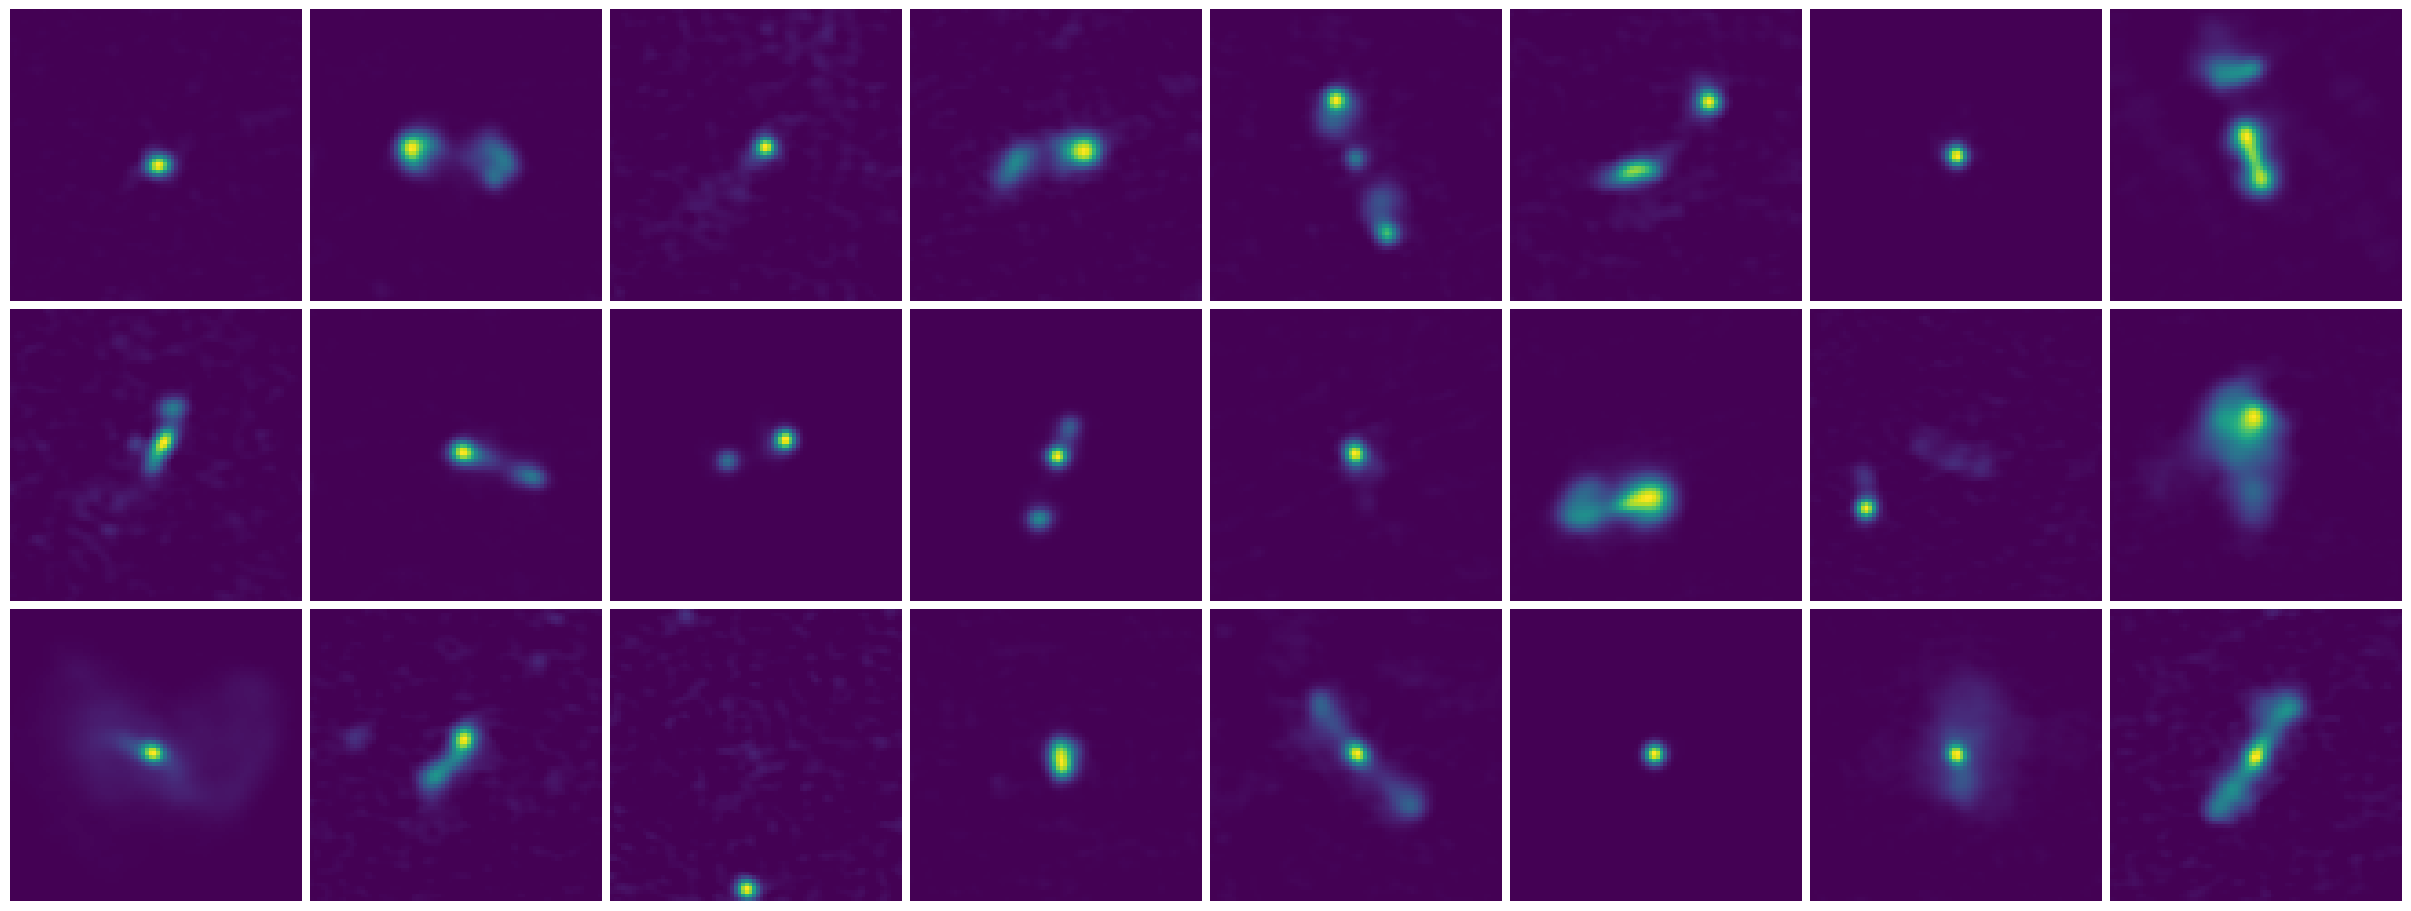

In [12]:
from plotting.plot_images import random_image_grid

random_image_grid(
    dset,
    n_cols=8,
    n_rows=3,
)

In [13]:
import datasets.images as dsimg
reload(dsimg)
import datasets.cutouts as dscut
reload(dscut)
import pandas as pd
from utils.paths import LOFAR_RES_CAT, PLAYGROUND_DIR

cutout_file = Path(
    '/hs/fs08/data/group-brueggen/tmartinez/diffusion/image_data/LOFAR/cutouts/cutouts_80p_optC.hdf5'
)

# Test clipping with 0-clip
# dsimg.clip_cutouts(cutout_file, 0)

In [3]:
import datasets.cutouts as dscut
reload(dscut)

# Test scanning cutouts
dscut.scan_cutouts(cutout_file)

Reading file cutouts_80p_optC.hdf5...
Adding broken flag...
Adding edge relative max...


	: 100%|██████████| 314942/314942 [00:02<00:00, 141241.84it/s]


Adding Sigma-SNR...


	: 100%|██████████| 314942/314942 [05:51<00:00, 896.21it/s]


Saving catalog...


/hs/fs08/data/group-brueggen/tmartinez/diffusion/src/datasets/cutouts.py:272: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Mosaic_ID', 'Source_Name', 'S_Code', 'Created', 'Position_from',
       'Renamed_from', 'UID_L', 'UNWISE_OBJID', 'ID_NAME', 'type', 'star',
       'ANYMASK_OPT', 'gmmcomp', '2RXS_ID', 'XMMSL2_ID', 'z_source', 'Field',
       'LAS_from', 'WISE_Src'],
      dtype='object')]

  catalog.to_hdf(


In [17]:
import h5py
import numpy as np

img_container = h5py.File(cutout_file, "r")
images = np.array(img_container['cutouts_0sigma'])
catalog = pd.read_hdf(cutout_file, key="catalog")

In [122]:
catalog = catalog[catalog[f"Clipped_0sigma"]]

(-0.5, 79.5, 79.5, -0.5)

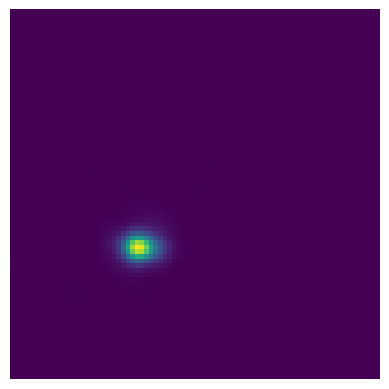

In [156]:
import numpy as np
import matplotlib.pyplot as plt

mask = (catalog['Sigma_SNR'] >= 5) & (catalog['Edge_max'] <= 0.8) & (catalog['Broken_cutout'])
i = np.random.choice(np.argwhere(mask).flatten())

plt.imshow(images[i])
plt.axis('off')
plt.axis('tight')
plt.axis('image')

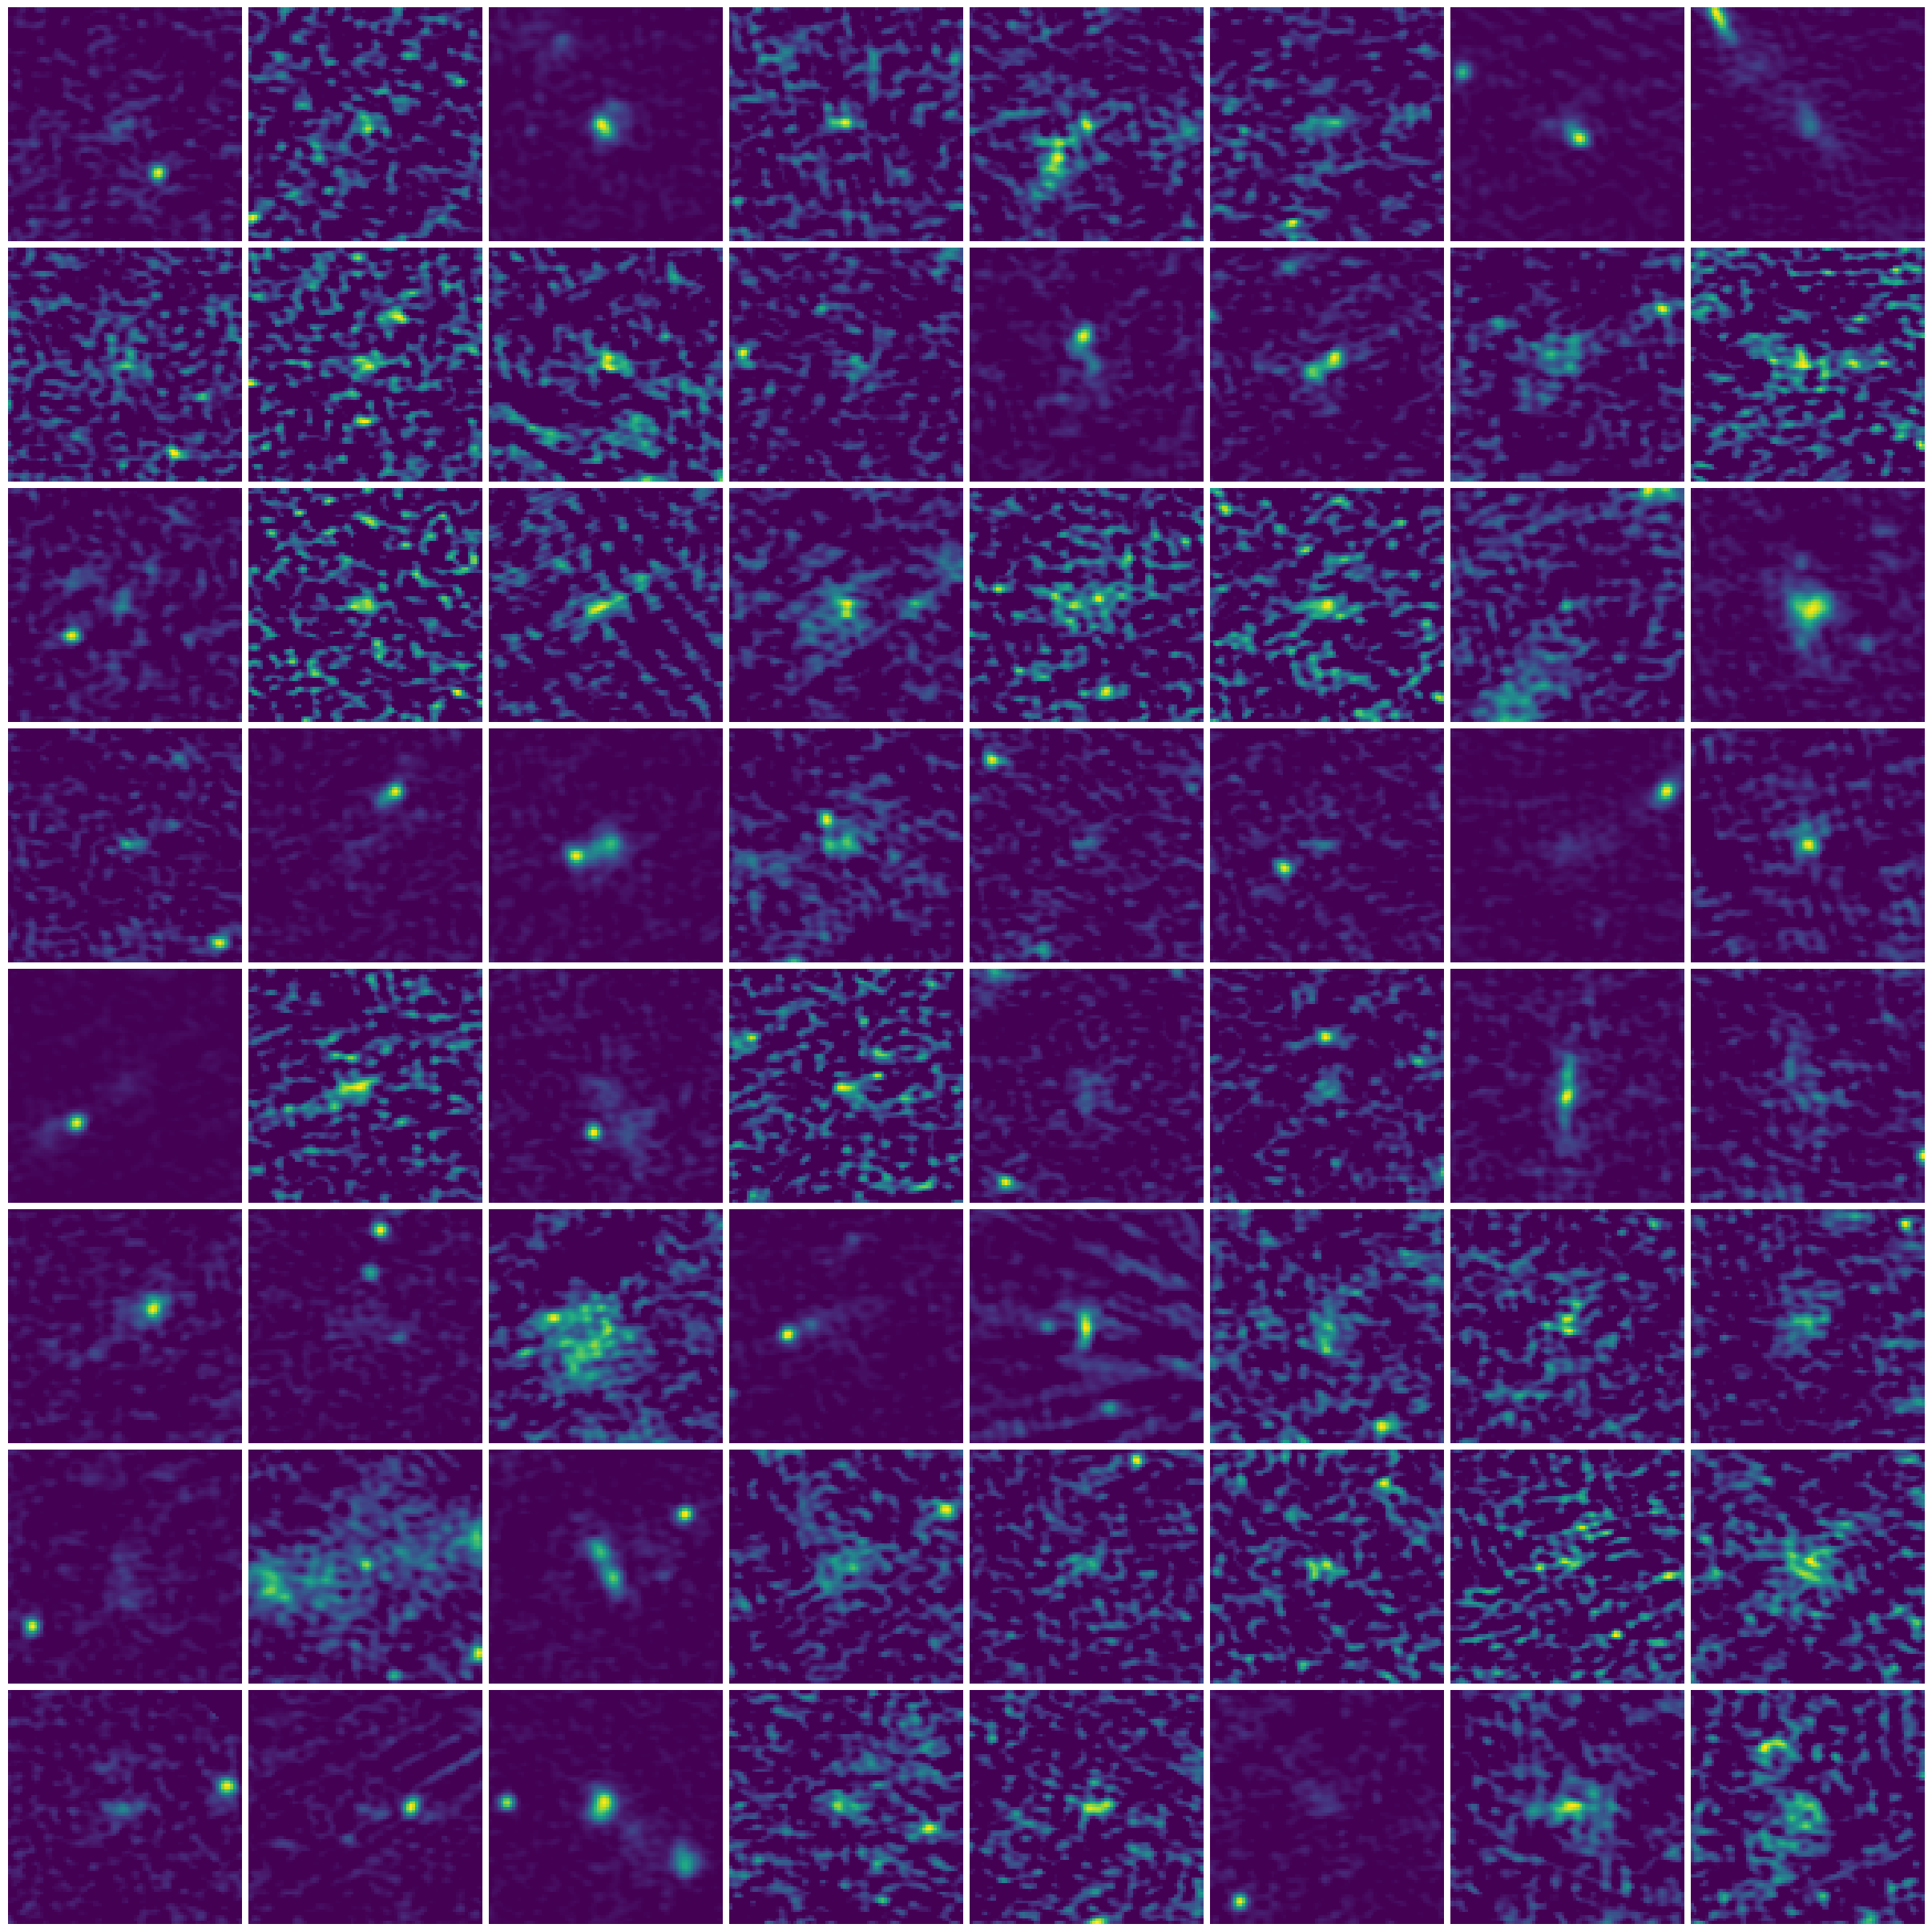

In [129]:
from plotting.plot_images import random_image_grid

random_image_grid(
    images[mask], vmin=None, vmax=None, n_img=64
)

In [91]:
len(np.argwhere(mask).flatten())

202141

In [3]:
import datasets.images as dsimg
reload(dsimg)

dsimg.create_subset(
    cutout_file,
    '2sigma-clip',
    clip_sigma=2,
)

cutouts_2sigma dataset not found. Clipping images...
Reading file cutouts_80p_optC.hdf5...


Clipping 2-sigma...: 100%|██████████| 314942/314942 [06:12<00:00, 845.06it/s]


Updating catalog...
Saving images...
Saving catalog...


/hs/fs08/data/group-brueggen/tmartinez/diffusion/src/datasets/images.py:77: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Mosaic_ID', 'Source_Name', 'S_Code', 'Created', 'Position_from',
       'Renamed_from', 'UID_L', 'UNWISE_OBJID', 'ID_NAME', 'type', 'star',
       'ANYMASK_OPT', 'gmmcomp', '2RXS_ID', 'XMMSL2_ID', 'z_source', 'Field',
       'LAS_from', 'WISE_Src'],
      dtype='object')]

  catalog.to_hdf(


Done.
Reading images: cutouts_2sigma...
	314_942 images in catalog.

Reading catalog...
	314_942 sources in catalog.

Creating catalog masks...
	Problematic sources:
	('Problem_cutout', 0)
 	('Nans_cutout', 668)
 	('Problem_clip', 0)
 	('Problem_resize', 0)
 	('Problem_norm', 653)

	1_228 sources with problems.

	LAS threshold:
	Zero LAS threshold, no cuts applied.
	0 sources below threshold.

	Flux threshold:
	Zero Total_flux threshold, no cuts applied.
	0 sources below threshold.

	SNR threshold:
	202_114 sources below threshold.

	Edge pixel threshold:
	31_886 sources with edge pixels above threshold.

	Broken images:
	678 sources with broken image.

	Combining masks...
	208_155 sources will be removed. 106_787 sources in subset.

Applying mask...
Saving subset to file...
Saving catalog to file...


/hs/fs08/data/group-brueggen/tmartinez/diffusion/src/datasets/images.py:193: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Mosaic_ID', 'Source_Name', 'S_Code', 'Created', 'Position_from',
       'Renamed_from', 'UID_L', 'UNWISE_OBJID', 'ID_NAME', 'type', 'star',
       'ANYMASK_OPT', 'gmmcomp', '2RXS_ID', 'XMMSL2_ID', 'z_source', 'Field',
       'LAS_from', 'WISE_Src'],
      dtype='object')]

  catalog_subset.to_hdf(subset_file, key="catalog", mode="a")


Subset file created:
	/hs/fs08/data/group-brueggen/tmartinez/diffusion/image_data/LOFAR/subsets/2sigma-clip.hdf5



In [4]:
import utils.paths as paths
import h5py
import numpy as np

cat = pd.read_hdf(cutout_file, key='catalog')

In [5]:
cat

,Mosaic_ID,Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,Nans_cutout,Problem_clip,Problem_resize,Problem_norm,Clipped_0sigma,Sigma_SNR_0sigma,Broken,Edge_max,Sigma_SNR,Broken_cutout
0,P001+33,ILTJ000000.18+332839.0,0.000745,33.477526,5.675420,4.155438,2.867390,1.186604,0.127763,0.050661,...,False,False,False,False,True,7,False,0.573071,2.234043,False
1,P000+36,ILTJ000000.46+350402.9,0.001929,35.067495,1.867248,1.078943,6.515649,1.565664,1.011111,0.211947,...,False,False,False,False,True,13,False,0.112842,3.449149,False
2,P000+31,ILTJ000000.57+321233.2,0.002387,32.209246,1.294636,0.941033,21.271353,1.222373,10.235927,0.117904,...,False,False,False,False,True,12,False,0.338577,4.027962,False
3,P359+28,ILTJ000001.13+274627.6,0.004706,27.774351,0.872598,0.542121,4.843736,0.609636,0.825433,0.089618,...,False,False,False,False,True,25,False,0.038685,6.658339,False
4,P000+36,ILTJ000001.18+353317.5,0.004918,35.554869,3.936812,2.306719,4.618138,1.546001,0.371396,0.115349,...,False,False,False,False,True,7,False,0.344405,2.568251,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314964,P359+28,ILTJ235958.58+281704.9,359.994091,28.284699,0.563687,0.473400,7.603151,0.644693,1.098109,0.081986,...,False,False,False,False,True,147,False,0.002416,22.435952,False
314965,P358+26,ILTJ235959.40+252513.3,359.997480,25.420384,0.012250,0.009535,718.190418,3.388108,276.731587,0.451227,...,False,False,False,False,True,217,False,0.004708,20.060221,False
314966,P359+21,ILTJ235959.46+211134.0,359.997734,21.192804,0.983562,1.024437,2.446802,0.522251,0.533322,0.094927,...,False,False,False,False,True,13,False,0.078352,4.802569,False
314967,P359+21,ILTJ235959.54+203813.4,359.998098,20.637058,0.350361,0.339009,42.713053,1.083909,12.155112,0.142713,...,False,False,False,False,True,7,False,0.692048,2.073796,False


In [10]:
import h5py
import numpy as np
import pandas as pd

with h5py.File(cutout_file, "r") as f:
    images = np.array(f["cutouts"])
catalog = pd.read_hdf(cutout_file, key="catalog")

In [29]:
import pandas as pd
import numpy as np

def mixed_type_cols(catalog):
    # Assume catalog is your DataFrame
    mixed_type_columns = catalog.apply(lambda x: x.map(type).nunique() > 1)

    # Get the names of the columns with mixed data types
    mixed_type_column_names = mixed_type_columns[mixed_type_columns].index.tolist()

    # For each column with mixed data types, print the name, unique data types, counts, percentages, and an example
    for column_name in mixed_type_column_names:
        print(f"Column: {column_name}")
        type_counts = catalog[column_name].map(lambda x: str(type(x))).value_counts()
        type_percentages = type_counts / len(catalog) * 100
        for dtype, count in type_counts.items():
            percentage = type_percentages[dtype]
            # Get an example of the current type
            example = catalog[column_name][catalog[column_name].map(lambda x: str(type(x))) == dtype].iloc[0]
            print(f"  Type: {dtype}, Count: {count}, Percentage: {percentage:.2f}%, Example: {example}")

In [28]:
import utils.paths as paths

dr2_cat = pd.read_csv(
    paths.LOFAR_RES_CAT
)

In [30]:
mixed_type_cols(dr2_cat)

Column: Position_from
  Type: <class 'str'>, Count: 314915, Percentage: 99.98%, Example: LR
  Type: <class 'float'>, Count: 54, Percentage: 0.02%, Example: nan
Column: Renamed_from
  Type: <class 'float'>, Count: 277902, Percentage: 88.23%, Example: nan
  Type: <class 'str'>, Count: 37067, Percentage: 11.77%, Example: ILTJ000000.57+321232.6
Column: UID_L
  Type: <class 'str'>, Count: 202997, Percentage: 64.45%, Example: 3598p335_0001491
  Type: <class 'float'>, Count: 111972, Percentage: 35.55%, Example: nan
Column: UNWISE_OBJID
  Type: <class 'str'>, Count: 228664, Percentage: 72.60%, Example: 0000p333o0018472
  Type: <class 'float'>, Count: 86305, Percentage: 27.40%, Example: nan
Column: ID_NAME
  Type: <class 'str'>, Count: 238315, Percentage: 75.66%, Example: 0000p333o0018472
  Type: <class 'float'>, Count: 76654, Percentage: 24.34%, Example: nan
Column: z_source
  Type: <class 'str'>, Count: 165987, Percentage: 52.70%, Example: Phot
  Type: <class 'float'>, Count: 148982, Percenta

In [41]:
s = dr2_cat.loc[42]
print(type(s['RA']))
s.to_frame().loc['RA'].dtype

<class 'numpy.float64'>


dtype('O')